# Network analysis of the school network

In [ ]:
import sys
import os
os.chdir(r'..')
sys.path.append(os.getcwd() + '/outputs')
sys.path.append(os.getcwd() + '/functions')
sys.path.append(os.getcwd() + '/data')

import pandas as pd
import numpy as np
import make_network as mn
import networkx as nx
import scipy.stats as st
import igraph as ig
from community import community_louvain as community

from patsy import dmatrices

import matplotlib.pyplot as plt

import matplotlib
import seaborn as sbn 

import network_analysis as nal



import transnet


%matplotlib inline



## Exploring homophily in the school network by denomination 

/Users/jmunday/miniconda3/envs/Measles_NL/lib/python3.9/site-packages/IPython/core/events.py:93: UserWarning: Glyph 149 (\x95) missing from current font.
  func(*args, **kwargs)
/Users/jmunday/miniconda3/envs/Measles_NL/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 149 (\x95) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


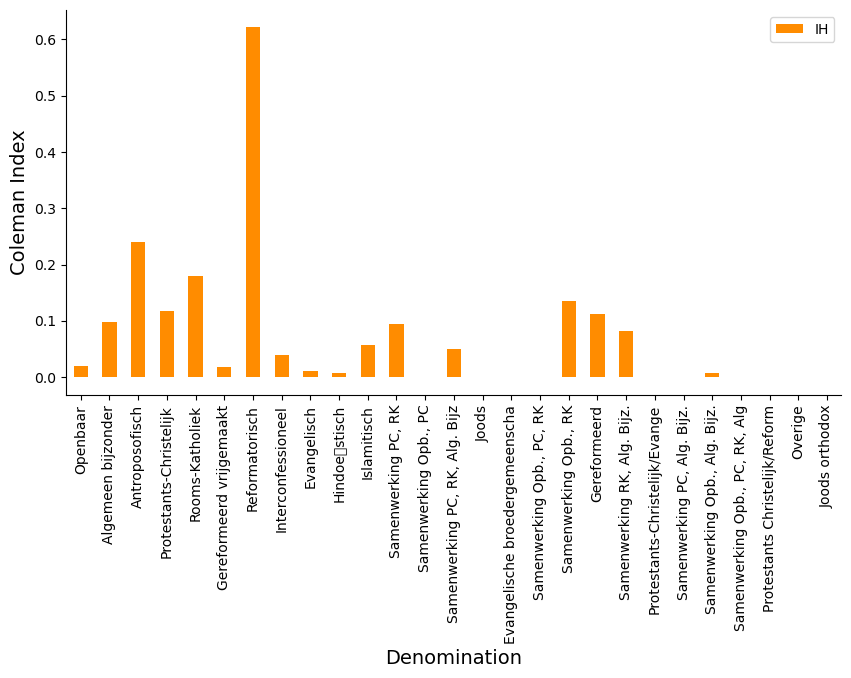

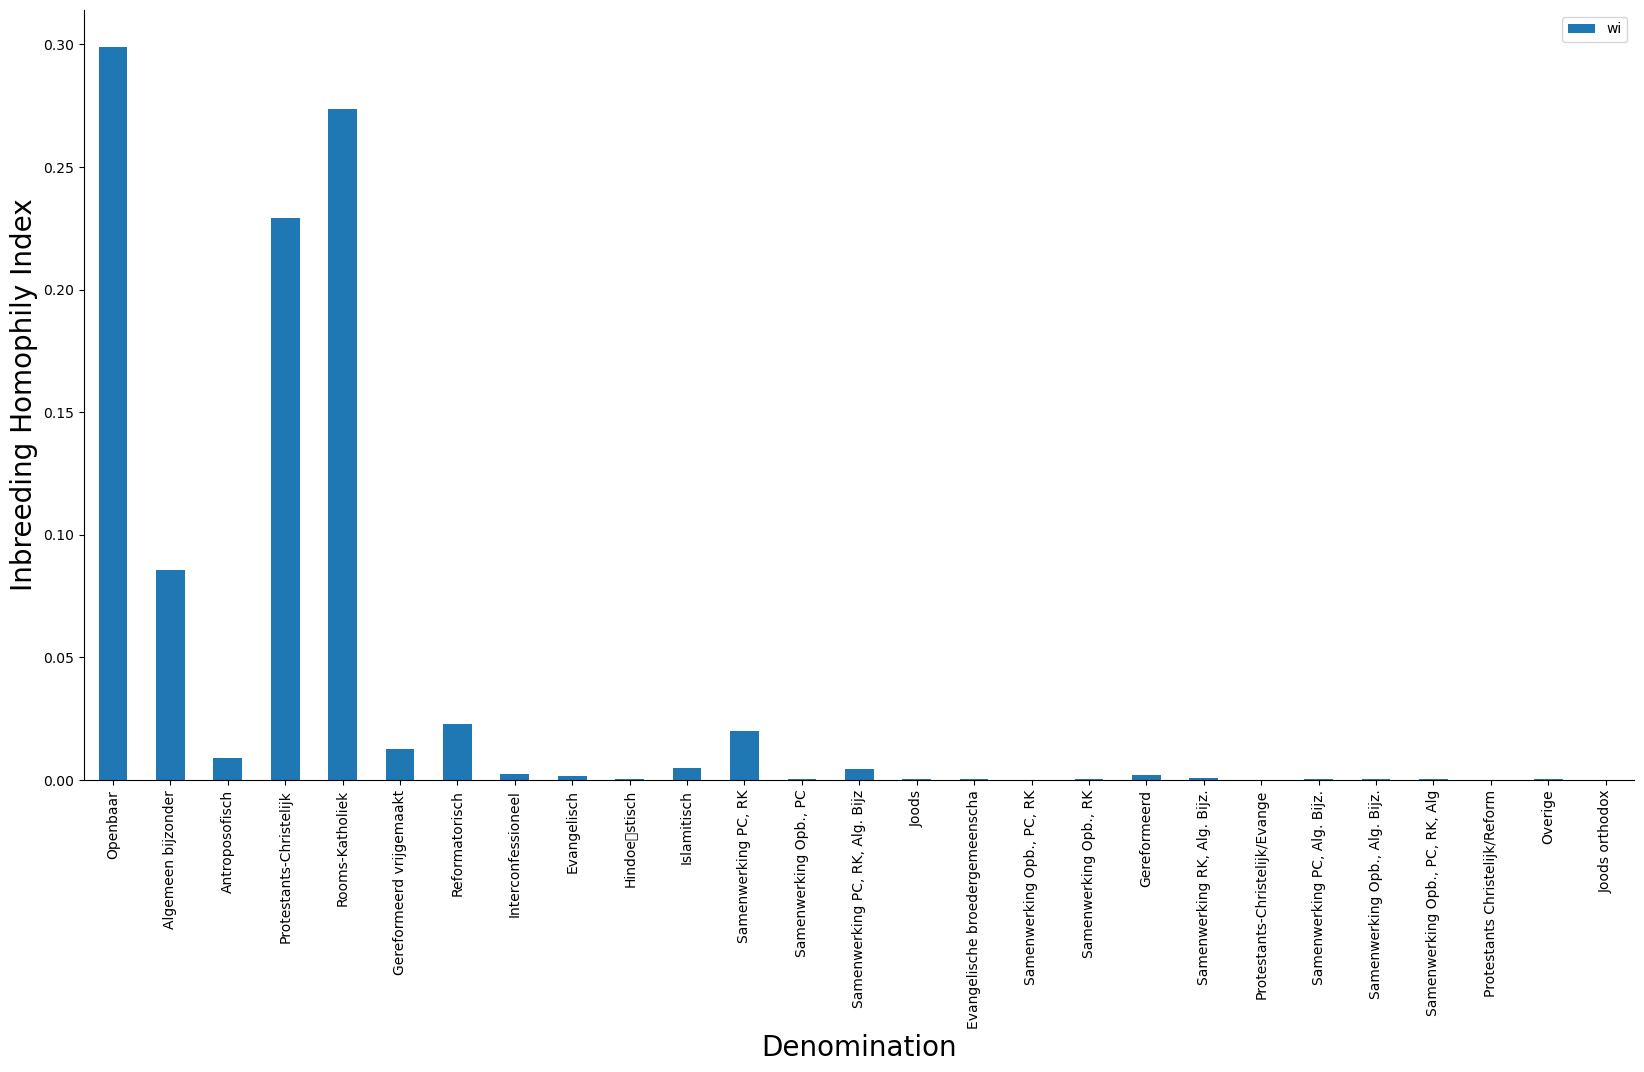

In [2]:
hom = nal.calculate_homophily(transnet.data_net, transnet.school_data)

Text(0.5, 0, 'Coleman Index')

/Users/jmunday/miniconda3/envs/Measles_NL/lib/python3.9/site-packages/IPython/core/events.py:93: UserWarning: Glyph 149 (\x95) missing from current font.
  func(*args, **kwargs)
/Users/jmunday/miniconda3/envs/Measles_NL/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 149 (\x95) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


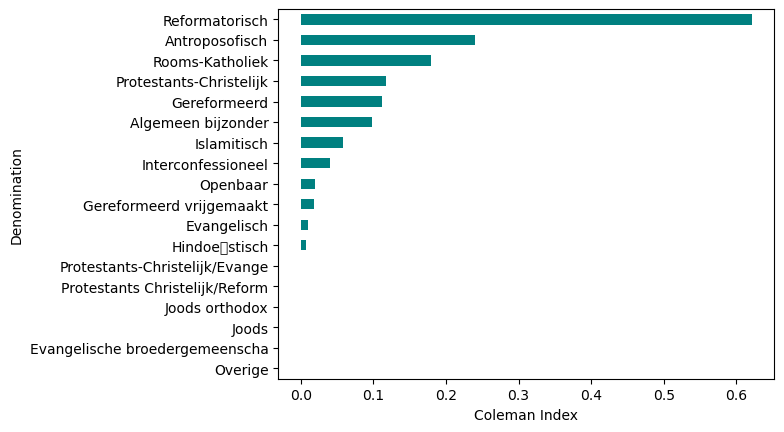

In [3]:
unique_denoms = [d for d in hom.Denomination if 'Samen' not in d]
ax = hom.sort_values('IH').query('Denomination in @unique_denoms').set_index('Denomination').IH.plot(kind='barh', color='Teal')
ax.set_xlabel('Coleman Index')

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]),
 [Text(0.0, 0, '0.0'),
  Text(0.1, 0, '0.1'),
  Text(0.2, 0, '0.2'),
  Text(0.30000000000000004, 0, '0.3'),
  Text(0.4, 0, '0.4'),
  Text(0.5, 0, '0.5'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.7000000000000001, 0, '0.7')])

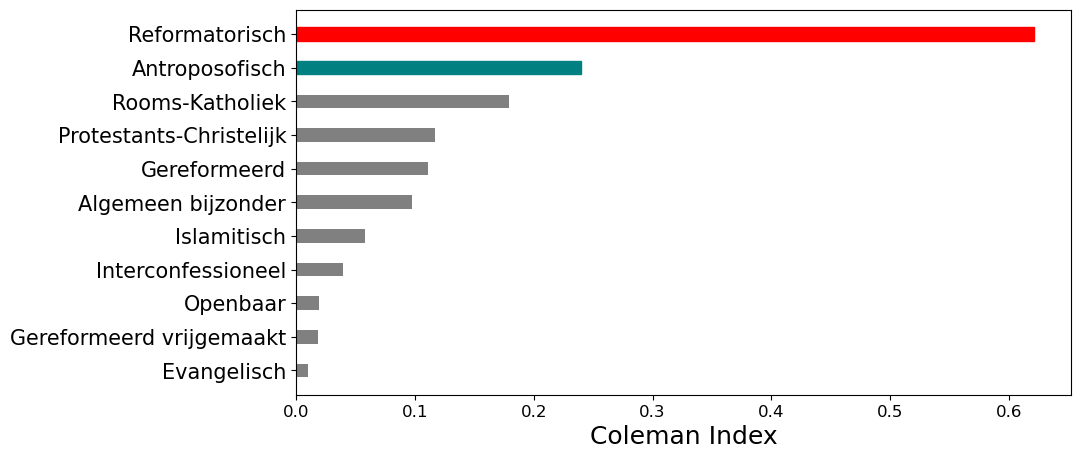

In [4]:
unique_denoms = [d for d in hom.Denomination if 'Samen' not in d]

fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot(111)
barlist = plt.barh(range(11), 
                   np.array(hom.sort_values('IH').query('Denomination in @unique_denoms').set_index('Denomination').IH)[-11:], 
                   color='Grey', height=0.4)
ax.set_xlabel('Coleman Index', fontsize=18)
barlist[-1].set_color('r')
barlist[-2].set_color('Teal')
#barlist[-2].set_color('r')
ax.set_yticks(range(11))
ax.set_yticklabels(np.array(hom.sort_values('IH').query('Denomination in @unique_denoms').Denomination)[-11:], fontsize=15)
plt.xticks(fontsize=12)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]),
 [Text(0.0, 0, '0.0'),
  Text(0.1, 0, '0.1'),
  Text(0.2, 0, '0.2'),
  Text(0.30000000000000004, 0, '0.3'),
  Text(0.4, 0, '0.4'),
  Text(0.5, 0, '0.5'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.7000000000000001, 0, '0.7')])

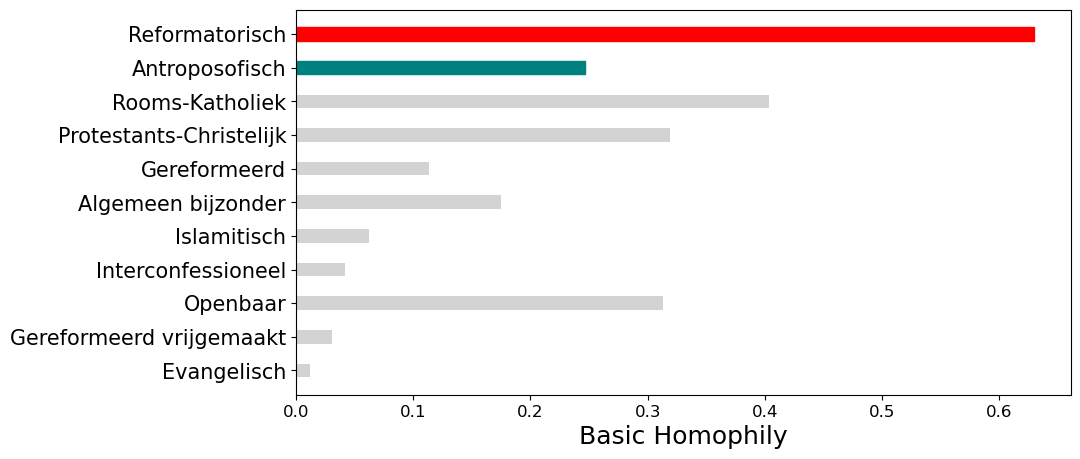

In [5]:
unique_denoms = [d for d in hom.Denomination if 'Samen' not in d]

fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot(111)
barlist = plt.barh(range(11), 
                   np.array(hom.sort_values('IH').query('Denomination in @unique_denoms').set_index('Denomination').Hi)[-11:], 
                   color='LightGrey', height=0.4)
ax.set_xlabel('Basic Homophily', fontsize=18)
barlist[-1].set_color('r')
barlist[-2].set_color('Teal')
ax.set_yticks(range(11))
ax.set_yticklabels(np.array(hom.sort_values('IH').query('Denomination in @unique_denoms').Denomination)[-11:], fontsize=15)
plt.xticks(fontsize=12)

In [6]:
hom.sort_values('IH', ascending=False).query('Denomination in @unique_denoms').drop('wi', axis=1)

Denomination        Hi        IH
6                   Reformatorisch  0.629629  0.621062
2                   Antroposofisch  0.246438  0.239744
4                  Rooms-Katholiek  0.403496  0.178959
3          Protestants-Christelijk  0.318992  0.116696
18                    Gereformeerd  0.113148  0.111409
1               Algemeen bijzonder  0.175166  0.097899
10                     Islamitisch  0.062285  0.057778
7               Interconfessioneel  0.041774  0.039582
0                         Openbaar  0.312790  0.019490
5         Gereformeerd vrijgemaakt  0.030618  0.018131
8                      Evangelisch  0.011815  0.010093
9                    Hindoestisch  0.007895  0.007355
20  Protestants-Christelijk/Evange  0.000000 -0.000109
24  Protestants Christelijk/Reform  0.000000 -0.000109
26                  Joods orthodox  0.000000 -0.000109
14                           Joods  0.000000 -0.000217
15  Evangelische broedergemeenscha  0.000000 -0.000217
25                         Overige  0.000000 -0.000326

## Evaluating network distance vs physical distance by denomination 

In [7]:
gd_ref, wd_ref, ud_ref, gd_nre, wd_nre, ud_nre = nal.compare_denom(transnet.data_net, transnet.school_data, 
                                                                   'Reformatorisch', sample=30)

In [8]:
gd_ant, wd_ant, ud_ant, gd_nan, wd_nan, ud_nan = nal.compare_denom(transnet.data_net, transnet.school_data, 'Antroposofisch', sample=30)

In [9]:
distance_ratio_ant = wd_ant/(0.001 * gd_ant + 1.e-10)
distance_ratio_notant = wd_nan/(0.001 *gd_nan + 1.e-10)
distance_ratio_ref = wd_ref/(0.001 *gd_ref + 1.e-10)
distance_ratio_notref = wd_nre/(0.001 *gd_nre + 1.e-10)

In [10]:
mean_ant = distance_ratio_ant.mean()
lower_ant = st.scoreatpercentile(distance_ratio_ant,25)
upper_ant = st.scoreatpercentile(distance_ratio_ant,75)

mean_nan = distance_ratio_notant.mean()
lower_nan = st.scoreatpercentile(distance_ratio_notant,25)
upper_nan = st.scoreatpercentile(distance_ratio_notant,75)

In [11]:
print (mean_ant, lower_ant, upper_ant)
print (mean_nan, lower_nan, upper_nan)

2.4040354116711646 1.0257933535507853 2.799050915136278
3.226013267716464 1.1705035494864295 3.2044673899079728


In [12]:
mean_ref = st.scoreatpercentile(distance_ratio_ref, 50 )
lower_ref = st.scoreatpercentile(distance_ratio_ref,25)
upper_ref = st.scoreatpercentile(distance_ratio_ref,75)

mean_nre = st.scoreatpercentile(distance_ratio_notref,50)
lower_nre = st.scoreatpercentile(distance_ratio_notref,25)
upper_nre = st.scoreatpercentile(distance_ratio_notref,75)

In [13]:
 yerr = np.array([[lower_ref, upper_ref],[lower_nre, upper_nre],[lower_ant, upper_ant],[lower_nan, upper_nan]])

In [15]:
means = np.array([mean_ref, mean_nre, mean_ant, mean_nan])
means

array([0.48194891, 4.40259274, 2.40403541, 3.22601327])

(array([ 0,  5, 10, 15, 20, 25]),
 [Text(0, 0, '0'),
  Text(0, 5, '5'),
  Text(0, 10, '10'),
  Text(0, 15, '15'),
  Text(0, 20, '20'),
  Text(0, 25, '25')])

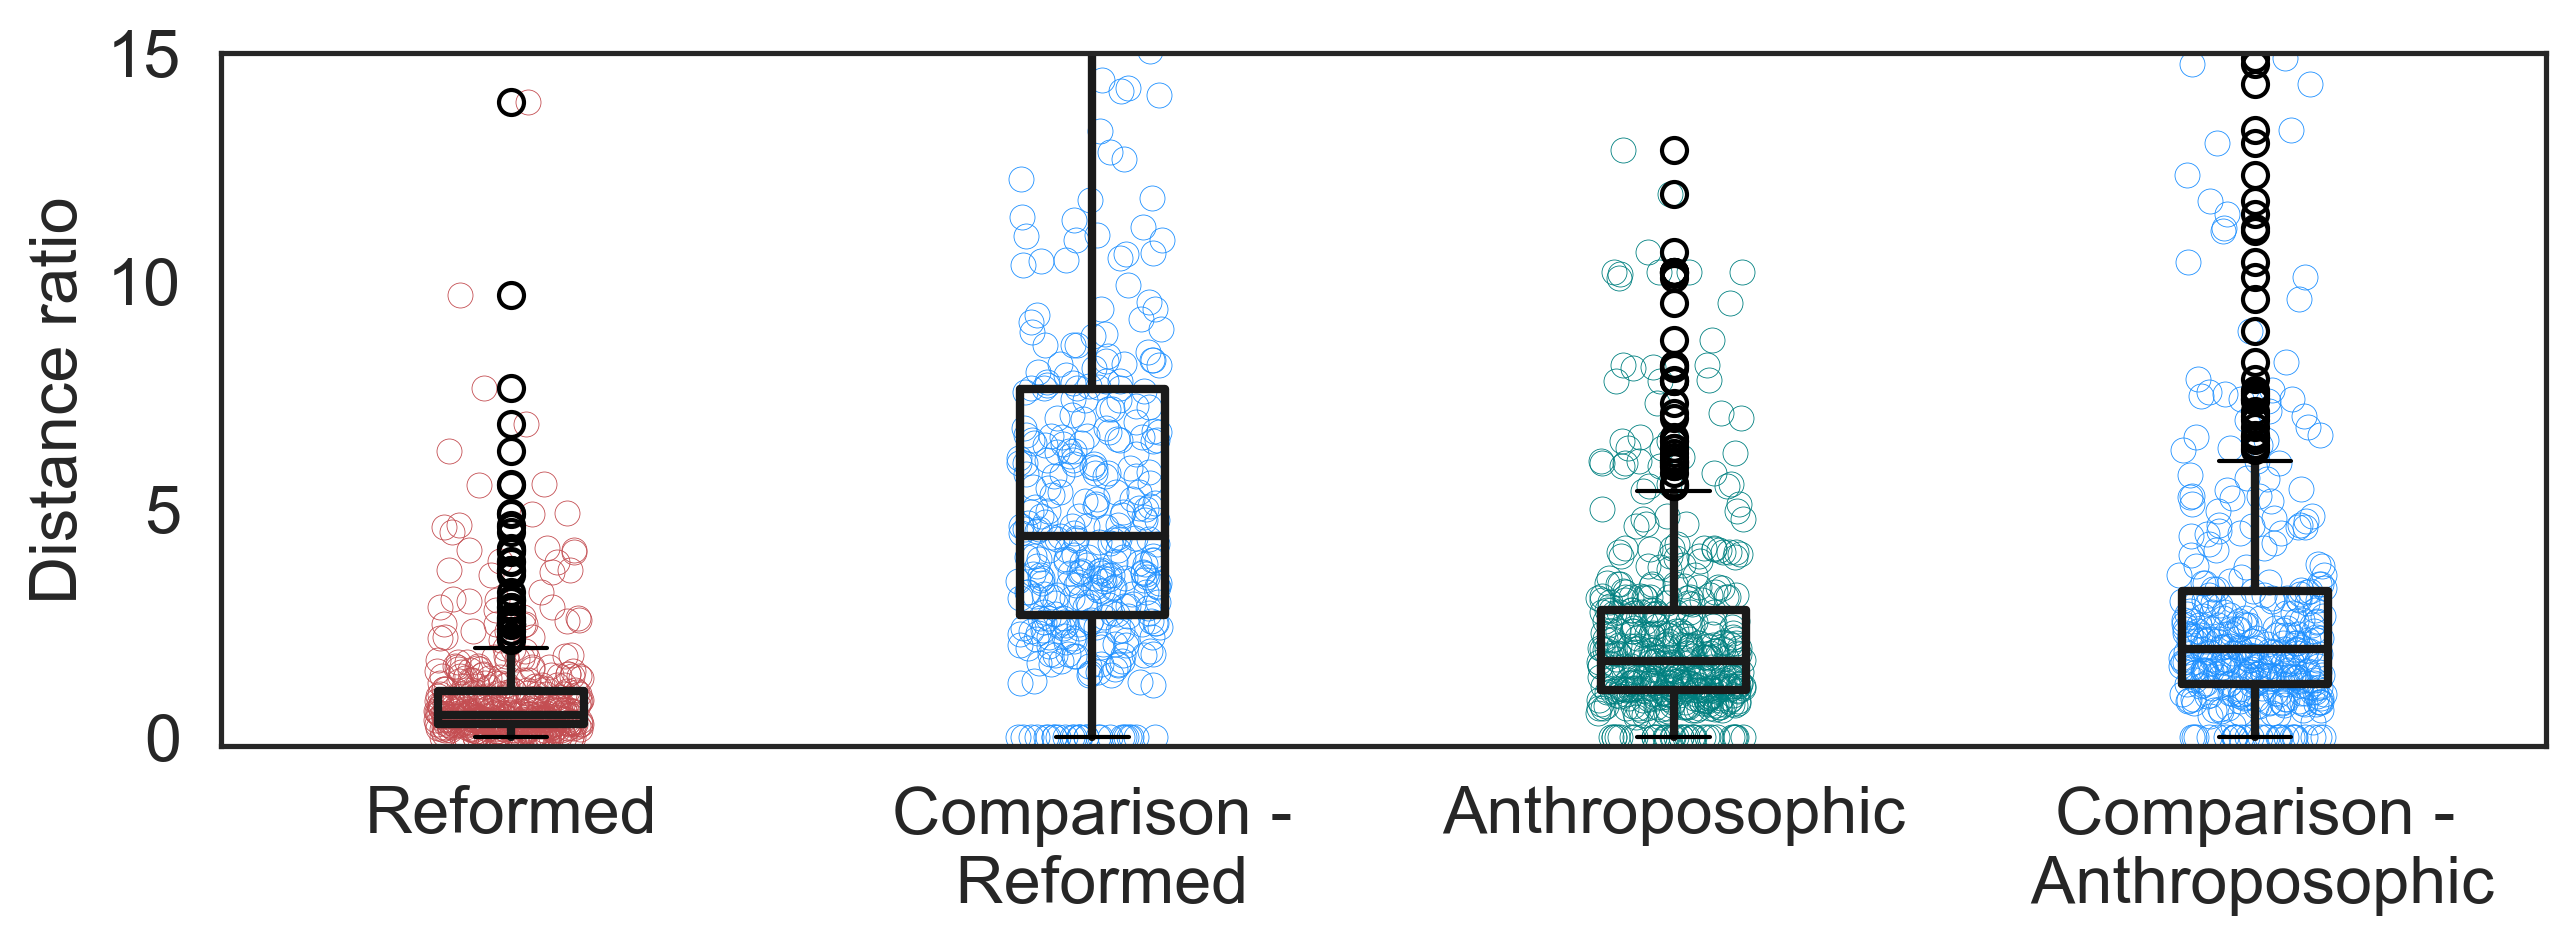

In [17]:
sbn.set(style='white')
plt.figure(figsize=[10,3], dpi=300)

randomx_r = np.random.random(len(distance_ratio_ref))
randomx_nr = np.random.random(len(distance_ratio_notref))
randomx_a = np.random.random(len(distance_ratio_ant))
randomx_na = np.random.random(len(distance_ratio_notant))

plt.plot(0.87 + randomx_r*0.25, distance_ratio_ref, 'o', mec='r', mew=0.2, mfc='none')
plt.plot(1.87 + randomx_nr*0.25, distance_ratio_notref, 'o', mec='DodgerBlue', mew=0.2, mfc='none')
plt.plot(2.87 + randomx_a*0.25, distance_ratio_ant, 'o', mec='Teal', mew=0.2, mfc='none')
plt.plot(3.87 + randomx_na*0.25, distance_ratio_notant, 'o', mec='DodgerBlue', mew=0.2, mfc='none')

boxprops = dict(linewidth=2, color='k')
whiskerprops = dict(linewidth=2, color='k')
medianprops = dict(linewidth=2, color='k')
plt.boxplot([distance_ratio_ref, distance_ratio_notref, distance_ratio_ant, distance_ratio_notant], widths=0.25,boxprops=boxprops, whiskerprops=whiskerprops,medianprops=medianprops )

plt.yticks(range(0,26,5), fontsize=12)
plt.ylabel('Distance ratio', fontsize=16)
plt.xticks([1,2,3,4], ['Reformed', 'Comparison -\n Reformed', 'Anthroposophic', 'Comparison -\n Anthroposophic'], fontsize=16)
plt.ylim([-0.2,15])
plt.yticks(fontsize=16)




In [18]:
g,w,u = nal.distance_compare(transnet.data_net, transnet.school_data, np.random.choice(transnet.nodelist,30),weight='inv_weight')


In [19]:
grc,wrc,urc = nal.distance_compare(transnet.data_net, transnet.school_data, np.random.choice(np.array(transnet.school_data.query('Denomination == "Rooms-Katholiek"').BRIN),30),weight='inv_weight')


pairs generated
con_pairs generated
pairs provided
pairs provided


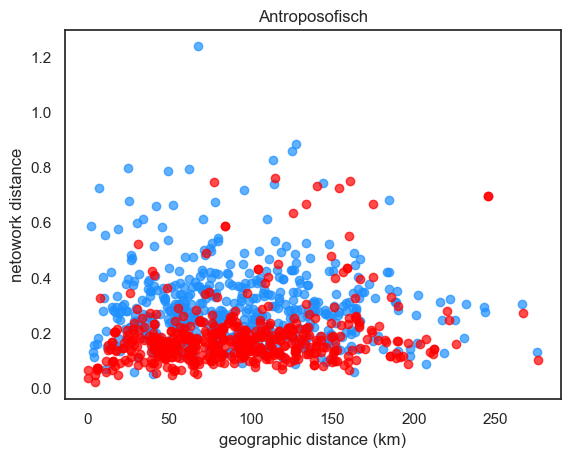

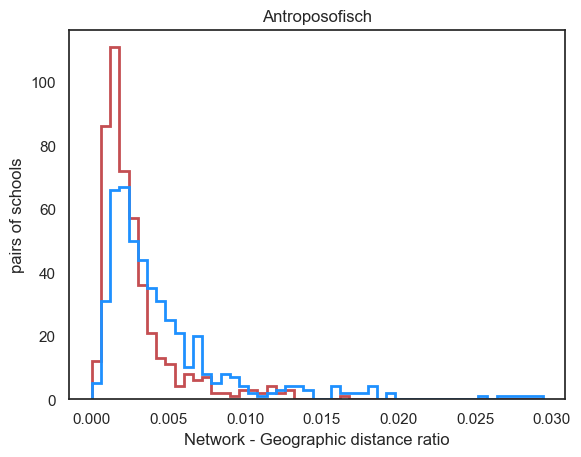

In [44]:
gd_ant_p, wd_ant_p, ud_ant_p, gd_nan_p, wd_nan_p, ud_nan_p = nal.compare_denom_prepairs(net=transnet.data_net, data=transnet.school_data, den='Antroposofisch', sample=500)


pairs generated
con_pairs generated
pairs provided
pairs provided


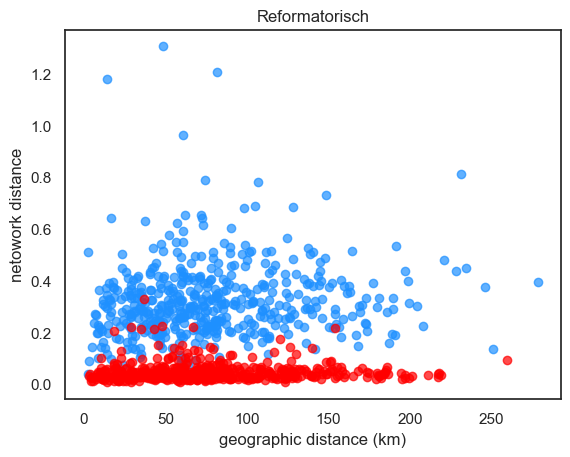

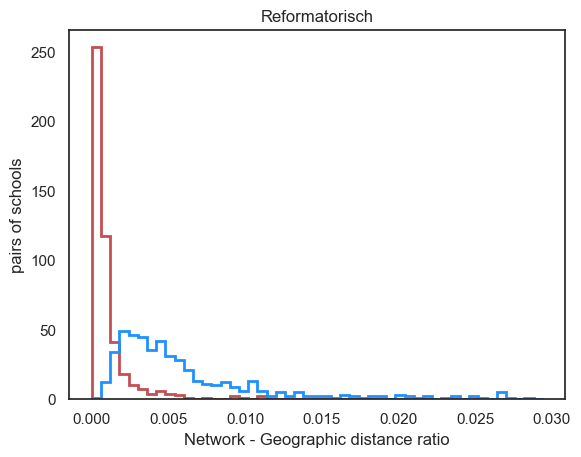

In [45]:
gd_ref_p, wd_ref_p, ud_ref_p, gd_nre_p, wd_nre_p, ud_nre_p = nal.compare_denom_prepairs(transnet.data_net, transnet.school_data, 'Reformatorisch', sample=500)

In [46]:
g,w,u = nal.distance_compare(transnet.data_net, transnet.school_data, transnet.nodelist,weight='inv_weight', sample=500)

selecting pairs


In [47]:
grc,wrc,urc = nal.distance_compare(transnet.data_net, transnet.school_data, np.array(transnet.school_data.query('Denomination == "Rooms-Katholiek"').BRIN),weight='inv_weight', sample=500)

selecting pairs


In [48]:
gpc,wpc,upc = nal.distance_compare(transnet.data_net, transnet.school_data, np.array(transnet.school_data.query('Denomination == "Protestants-Christelijk"').BRIN),weight='inv_weight', sample=500)

selecting pairs


## Communities in the network

In [50]:
partition = community.best_partition(transnet.data_net, weight='weight')

In [51]:
partition_frame = pd.DataFrame.from_dict(partition, orient='index').reset_index()

In [52]:
partition_frame.columns = ['BRIN', 'Part']

In [53]:
school_data_parts = transnet.school_data.merge(partition_frame, on='BRIN', how='inner')

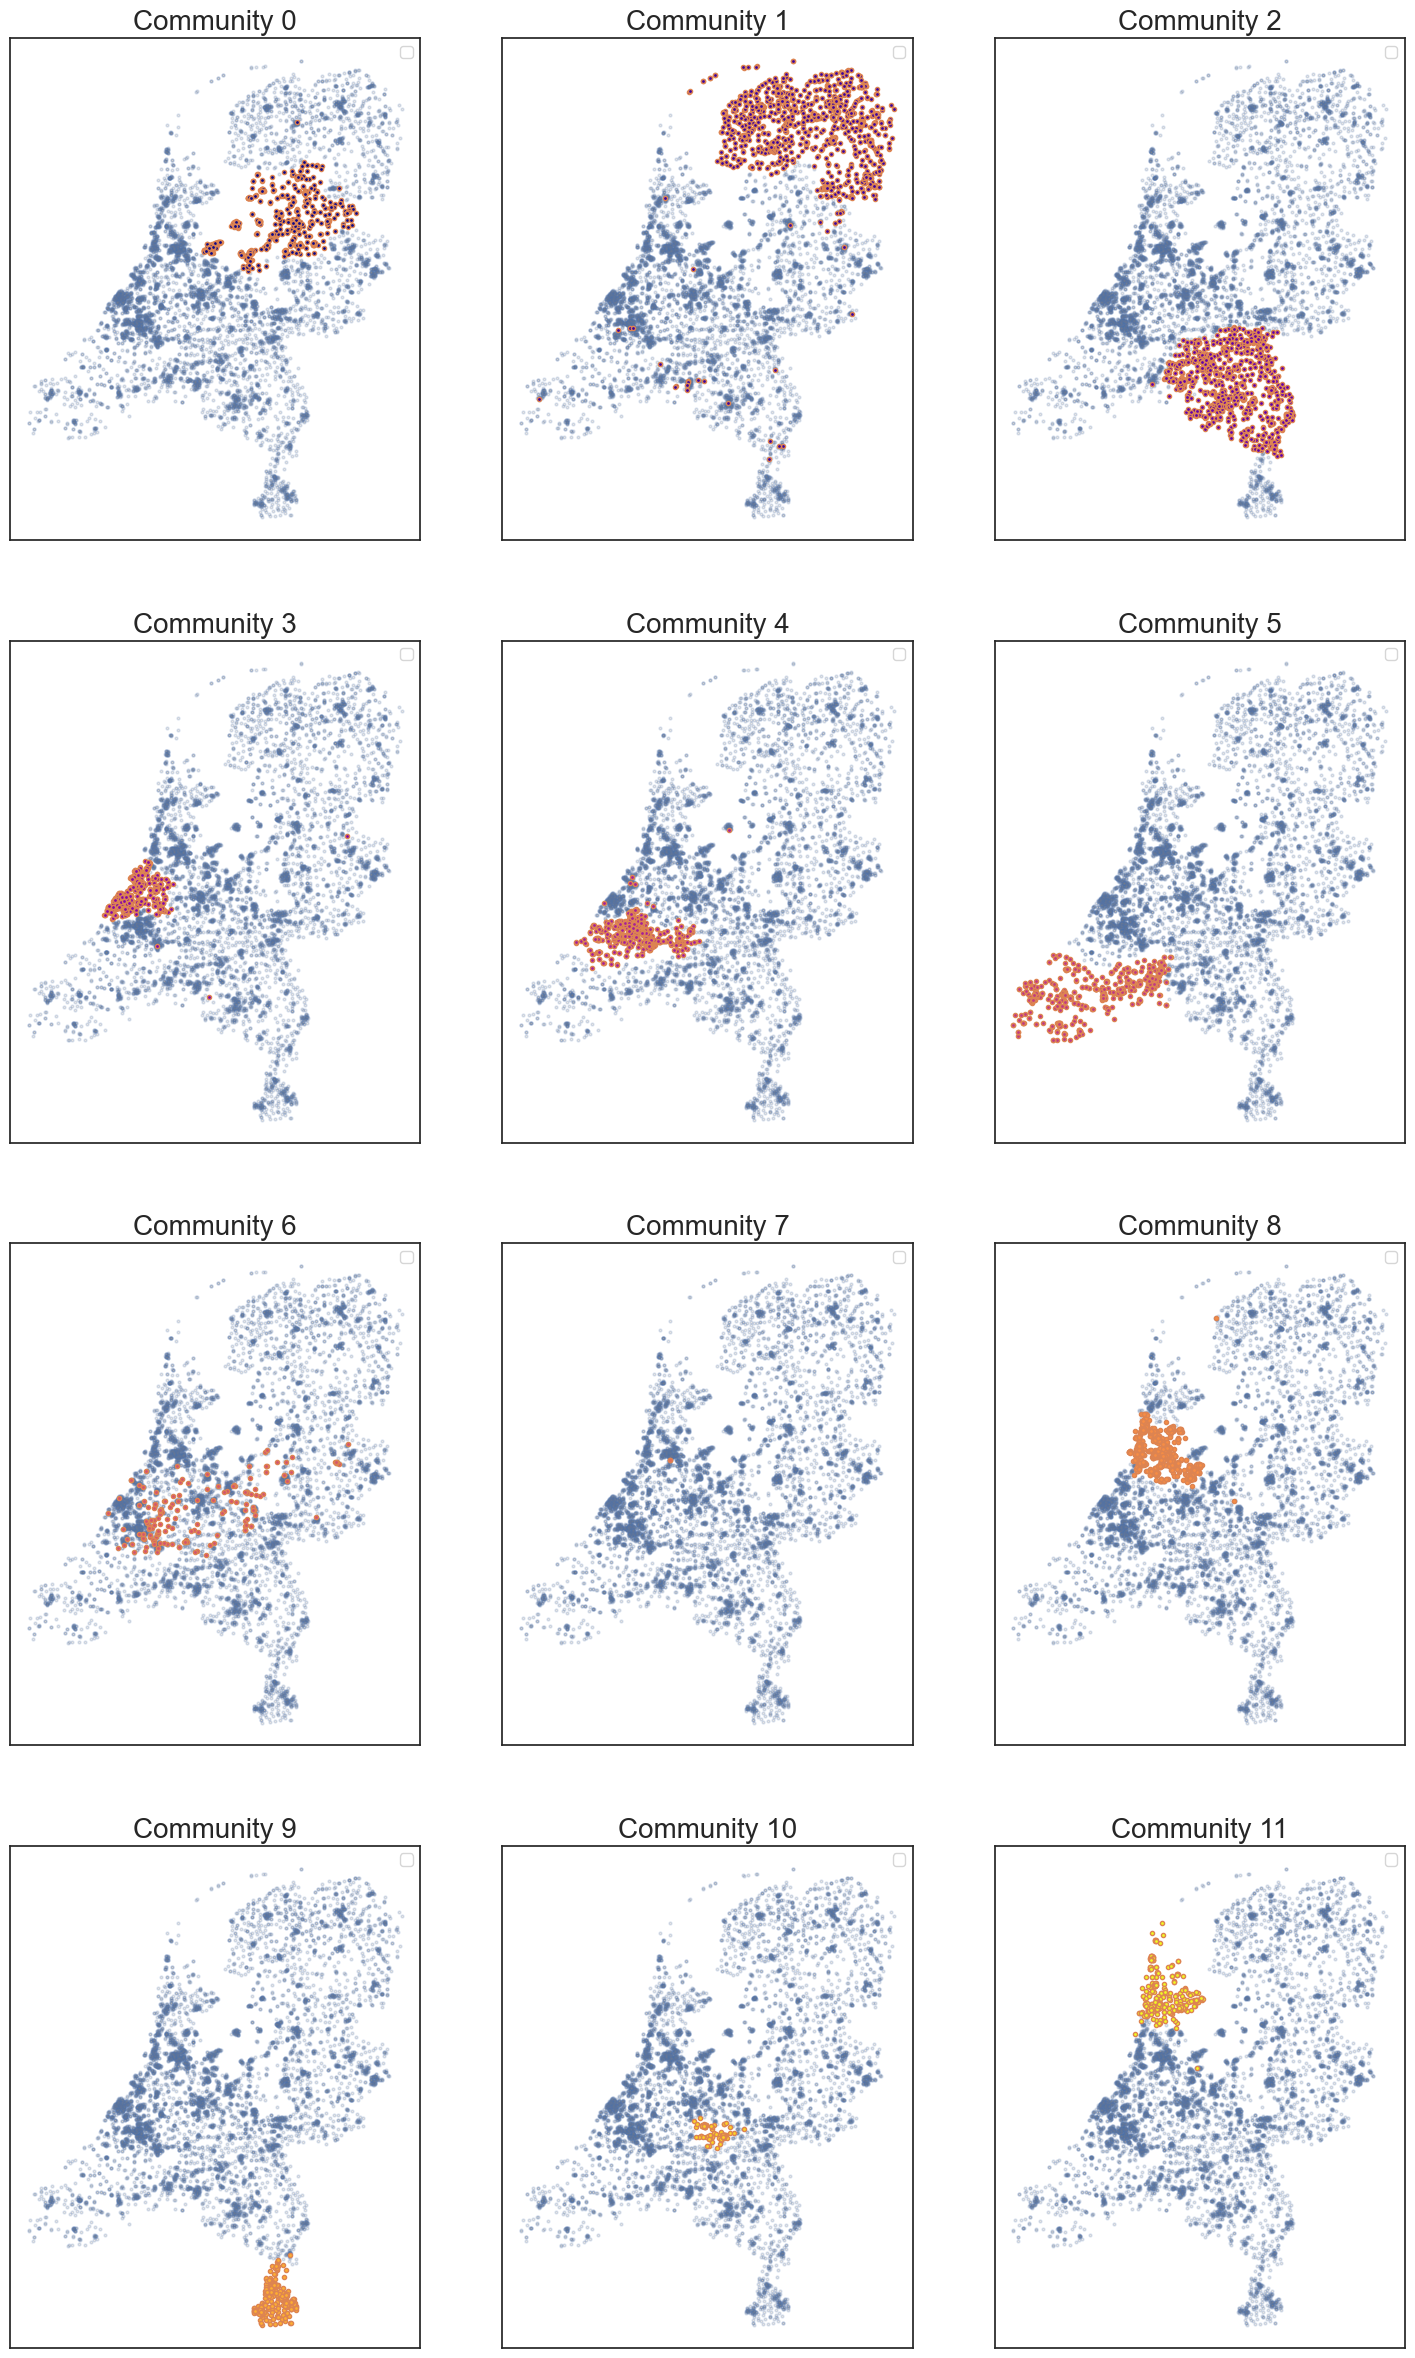

In [54]:
NUM_COLORS = 12
cm = plt.get_cmap('plasma')
colors = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]
fig = plt.figure(figsize=[18,30])
for part in range(12):
    
    ax=fig.add_subplot(4,3,part+1)
    pd.DataFrame(school_data_parts).query('Part != @part').plot(x='x_coord', y='y_coord', style='o',ms=2, mfc='Grey', ax=ax, alpha=0.2)
    pd.DataFrame(school_data_parts).query('Part == @part').plot(x='x_coord', y='y_coord', style='o',ms=3, mfc=cm(part/11.), ax=ax, alpha=1.)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_title('Community ' + str(part), fontsize=20)
    ax.legend([])

In [55]:
school_data_parts.query('Denomination == "Reformatorisch"').groupby('Part').count().BRIN

Part
0      30
1       2
2       1
3       1
5      36
6     133
12      3
13      2
Name: BRIN, dtype: int64

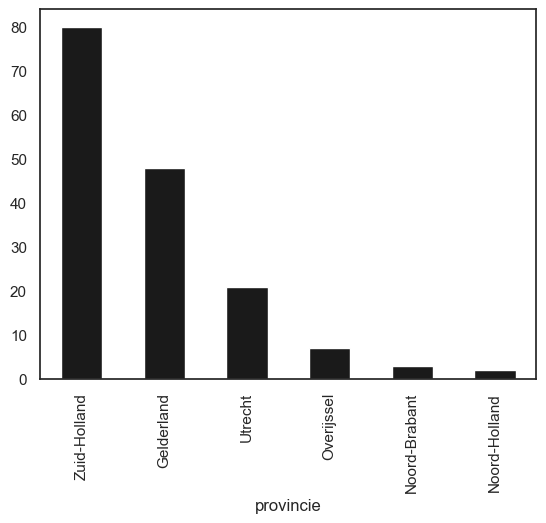

In [57]:
ax = school_data_parts.query('Part == 6.').groupby('provincie').count().BRIN.sort_values(ascending=False).plot(kind='bar', color='k')


In [58]:
school_data_parts.query('Denomination == "Reformatorisch"').groupby('Part').count().BRIN.sort_values(ascending= False)

Part
6     133
5      36
0      30
12      3
1       2
13      2
2       1
3       1
Name: BRIN, dtype: int64

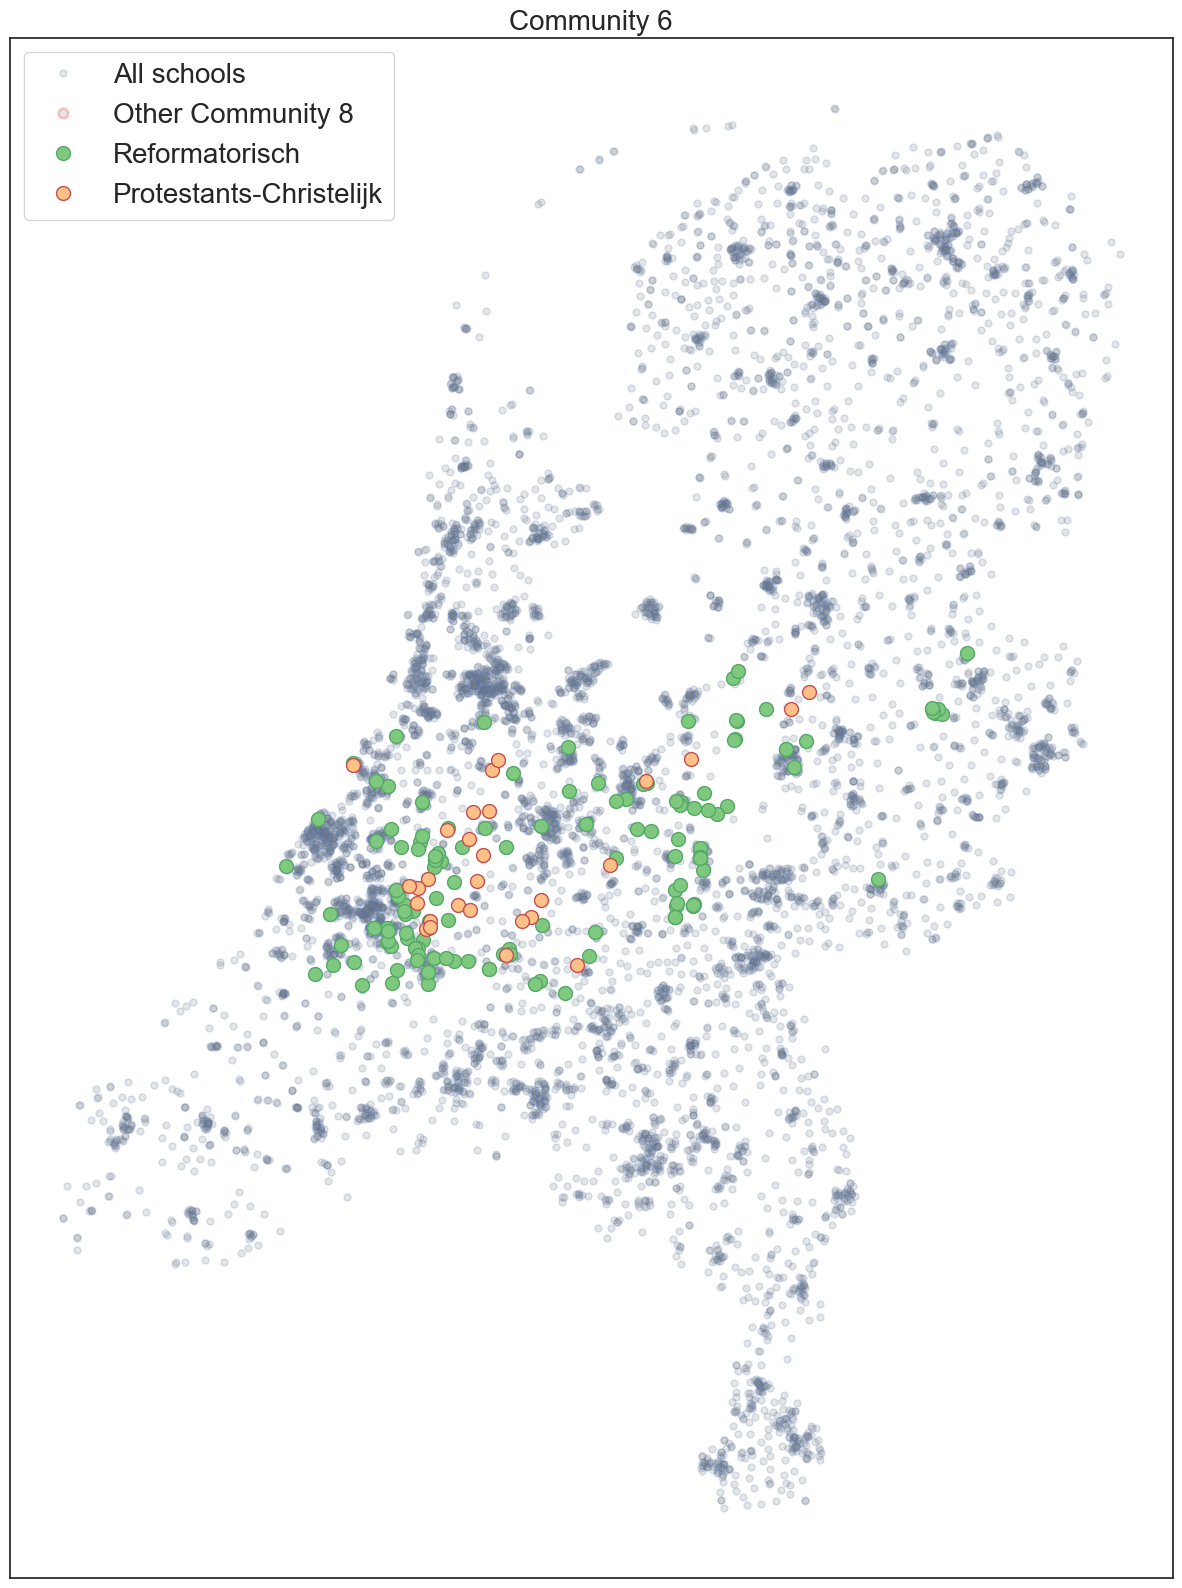

In [60]:
NUM_COLORS = 4
cm = plt.get_cmap('Accent')
colors = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]
fig = plt.figure(figsize=[15,20])
ax=fig.add_subplot(111)
pd.DataFrame(school_data_parts).query('Part != 6').plot(x='x_coord', y='y_coord', style='o',ms=5, mfc='Grey', ax=ax, alpha=0.2)
pd.DataFrame(school_data_parts).query('Part == 6 and provincie == "Zeeland"').plot(x='x_coord', y='y_coord', style='o',ms=7, mfc='Grey', mec='red', mew=2., ax=ax, alpha=0.2)

for i, Den in enumerate(school_data_parts.query('Part == 6. and provincie != "Zeeland"').Denomination.unique()):
    pd.DataFrame(school_data_parts).query('Part == 6 and Denomination == @Den').plot(x='x_coord', y='y_coord', style='o',ms=10, mfc=cm(i/4.), ax=ax, alpha=1.)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_title('Community 6', fontsize=20)
    ax.legend(['All schools', 'Other Community 8'] + list(school_data_parts.query('Part == 6. and provincie != "Zeeland"').Denomination.unique()), fontsize=20)

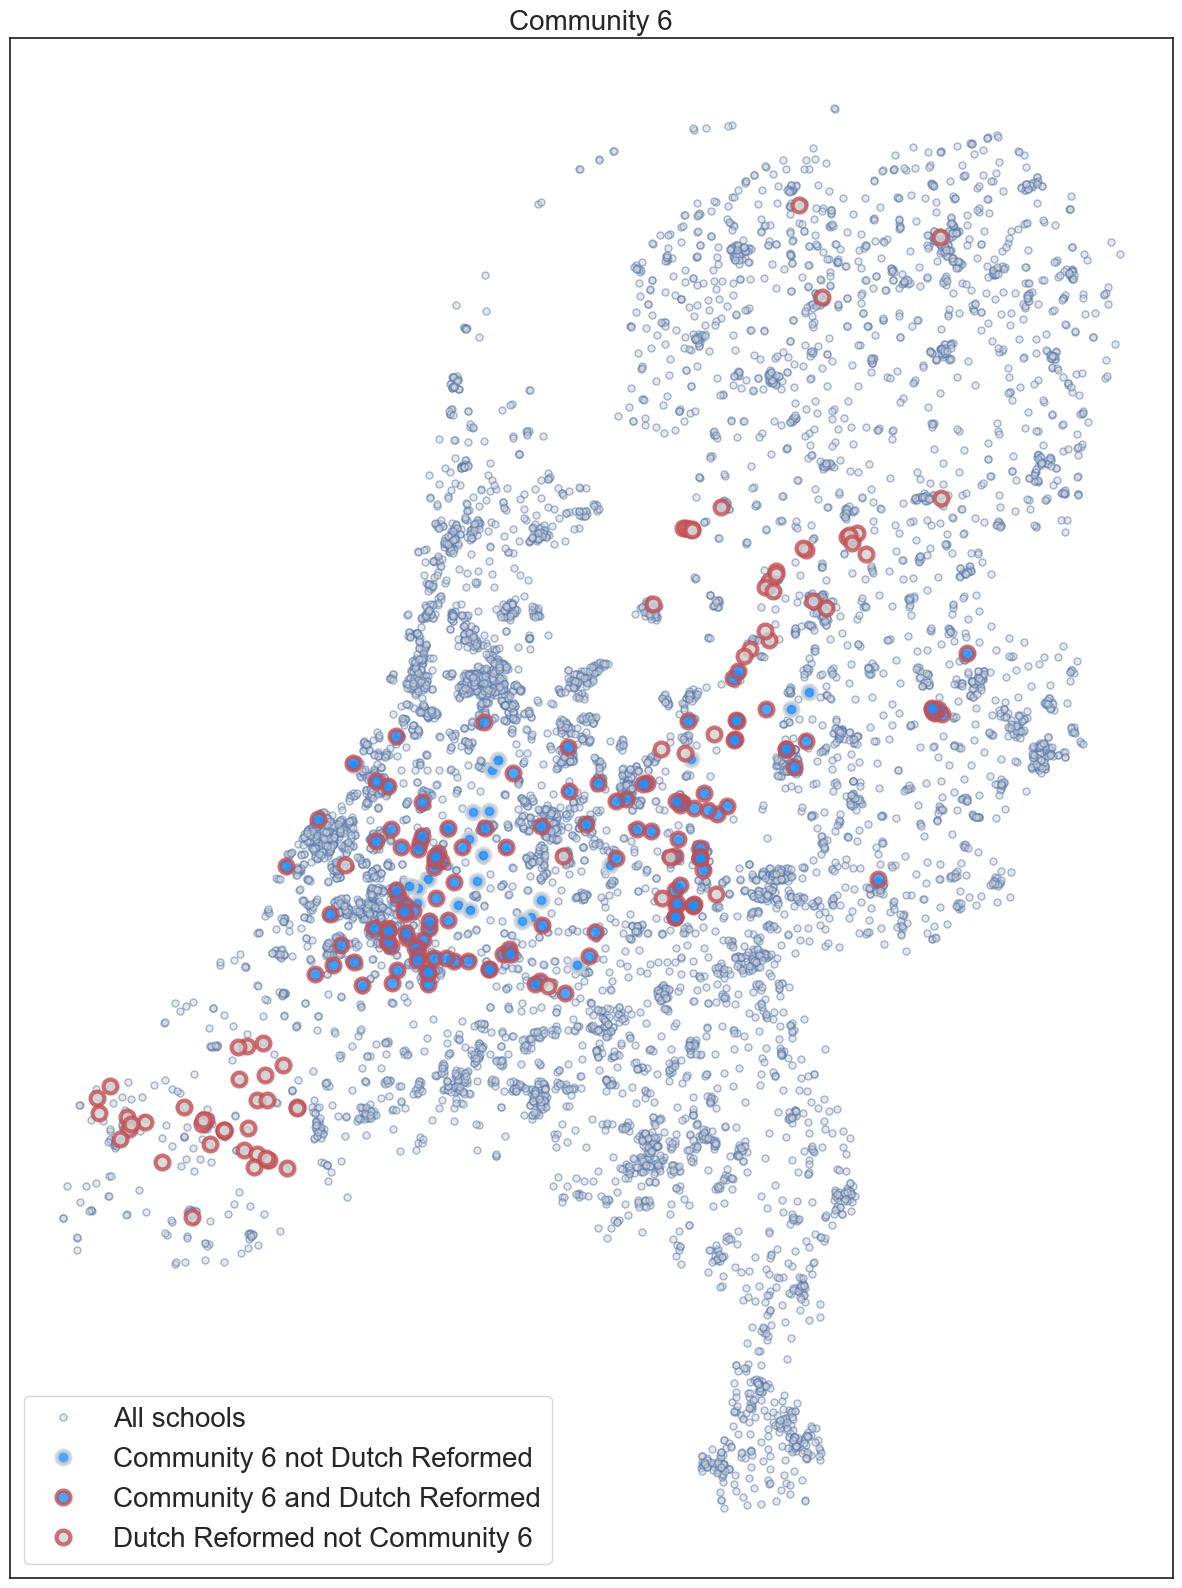

In [61]:
NUM_COLORS = 4
cm = plt.get_cmap('Accent')
colors = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]
fig = plt.figure(figsize=[15,20])
ax=fig.add_subplot(111)


pd.DataFrame(school_data_parts).query('Denomination != "Reformatorisch" and Denomination != "Antroposophisch" ').plot(x='x_coord', y='y_coord', style='o',ms=5, mfc='LightGrey', ax=ax, alpha=0.5)
pd.DataFrame(school_data_parts).query('Part == 6 and Denomination != "Reformatorisch"').plot(x='x_coord', y='y_coord', style='o',ms=10, mfc='DodgerBlue', mec='LightGrey', mew=3., ax=ax, alpha=0.8)
pd.DataFrame(school_data_parts).query('Part == 6 and Denomination == "Reformatorisch"').plot(x='x_coord', y='y_coord', style='o',ms=10, mfc='DodgerBlue', mec='r', mew=3., ax=ax, alpha=0.8)
pd.DataFrame(school_data_parts).query('Part != 6 and Denomination == "Reformatorisch"').plot(x='x_coord', y='y_coord', style='o',ms=10, mfc='LightGrey', mec='r', mew=3., ax=ax, alpha=0.8)




ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_title('Community 6', fontsize=20)
ax.legend(['All schools', 'Community 6 not Dutch Reformed','Community 6 and Dutch Reformed','Dutch Reformed not Community 6' ], fontsize=20)

### Note: more detailed analysis of communities is continued in the notebook titled: Dutch network - ensemble communities